In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import datetime

%matplotlib inline
warnings.filterwarnings("ignore")

from tensorflow import set_random_seed
from numpy.random import seed
set_random_seed(1)
seed(1)

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Dataset/newdata.csv', parse_dates=['Date'])
df.head()

,Unnamed: 0,Province/State,Country,latitude,longitude,Date,loc_id,Key,Confirmed,Deaths,Recovered
0,0,Not specified,Afghanistan,33.0,65.0,2020-01-22,0,0,0.0,0.0,0.0
1,1,Not specified,Afghanistan,33.0,65.0,2020-01-23,0,1,0.0,0.0,0.0
2,2,Not specified,Afghanistan,33.0,65.0,2020-01-24,0,2,0.0,0.0,0.0
3,3,Not specified,Afghanistan,33.0,65.0,2020-01-25,0,3,0.0,0.0,0.0
4,4,Not specified,Afghanistan,33.0,65.0,2020-01-26,0,4,0.0,0.0,0.0


In [3]:
df['Recovered'].fillna(0,inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Province/State,Country,latitude,longitude,Date,loc_id,Key,Confirmed,Deaths,Recovered
0,Not specified,Afghanistan,33.0,65.0,2020-01-22,0,0,0.0,0.0,0.0
1,Not specified,Afghanistan,33.0,65.0,2020-01-23,0,1,0.0,0.0,0.0
2,Not specified,Afghanistan,33.0,65.0,2020-01-24,0,2,0.0,0.0,0.0
3,Not specified,Afghanistan,33.0,65.0,2020-01-25,0,3,0.0,0.0,0.0
4,Not specified,Afghanistan,33.0,65.0,2020-01-26,0,4,0.0,0.0,0.0


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
df[['Confirmed', 'Deaths', 'Recovered']] = scaler.fit_transform(df[['Confirmed', 'Deaths', 'Recovered']])

In [7]:
train_date = []
test_date = []
t = pd.Timestamp(year=2020,month=3,day=1)

for i in range(len(df['Date'])):    
#     print((pd.Timestamp(df.iloc[i,4]) - t).days)
    if (pd.Timestamp(df.iloc[i,4]) - t).days >=0:
#         print(df.iloc[i,4])
        train_date.append(df.iloc[i,4])
    else:
#         print(df.iloc[i,4])
        test_date.append(df.iloc[i,4])

In [8]:
test = {'Province/State':[],
         'Country':[],
         'latitude':[],
         'longitude':[],
         'Date':[],
         'loc_id':[],
         'Key':[],
         'Confirmed':[],
         'Deaths':[],
         'Recovered':[]}
for i in range(len(df)):
    if df.iloc[i,4] in train_date:
        test['Province/State'].append(df.iloc[i,0])
        test['Country'].append(df.iloc[i,1])
        test['latitude'].append(df.iloc[i,2])
        test['longitude'].append(df.iloc[i,3])
        test['Date'].append(df.iloc[i,4])
        test['loc_id'].append(df.iloc[i,5])
        test['Key'].append(df.iloc[i,6])
        test['Confirmed'].append(df.iloc[i,7])
        test['Deaths'].append(df.iloc[i,8])
        test['Recovered'].append(df.iloc[i,9])

test = pd.DataFrame(test)
test.head()

,Province/State,Country,latitude,longitude,Date,loc_id,Key,Confirmed,Deaths,Recovered
0,Not specified,Afghanistan,33.0,65.0,2020-03-01,0,39,0.000569,0.005411,0.009469
1,Not specified,Afghanistan,33.0,65.0,2020-03-02,0,40,0.000569,0.005411,0.009469
2,Not specified,Afghanistan,33.0,65.0,2020-03-03,0,41,0.000569,0.005411,0.009469
3,Not specified,Afghanistan,33.0,65.0,2020-03-04,0,42,0.000569,0.005411,0.009469
4,Not specified,Afghanistan,33.0,65.0,2020-03-05,0,43,0.000569,0.005411,0.009469


In [9]:
train = {'Province/State':[],
         'Country':[],
         'latitude':[],
         'longitude':[],
         'Date':[],
         'loc_id':[],
         'Key':[],
         'Confirmed':[],
         'Deaths':[],
         'Recovered':[]}
for i in range(len(df)):
    if df.iloc[i,4] in test_date:
        train['Province/State'].append(df.iloc[i,0])
        train['Country'].append(df.iloc[i,1])
        train['latitude'].append(df.iloc[i,2])
        train['longitude'].append(df.iloc[i,3])
        train['Date'].append(df.iloc[i,4])
        train['loc_id'].append(df.iloc[i,5])
        train['Key'].append(df.iloc[i,6])
        train['Confirmed'].append(df.iloc[i,7])
        train['Deaths'].append(df.iloc[i,8])
        train['Recovered'].append(df.iloc[i,9])

train = pd.DataFrame(train)
train.head()

,Province/State,Country,latitude,longitude,Date,loc_id,Key,Confirmed,Deaths,Recovered
0,Not specified,Afghanistan,33.0,65.0,2020-01-22,0,0,0.000569,0.005411,0.009469
1,Not specified,Afghanistan,33.0,65.0,2020-01-23,0,1,0.000569,0.005411,0.009469
2,Not specified,Afghanistan,33.0,65.0,2020-01-24,0,2,0.000569,0.005411,0.009469
3,Not specified,Afghanistan,33.0,65.0,2020-01-25,0,3,0.000569,0.005411,0.009469
4,Not specified,Afghanistan,33.0,65.0,2020-01-26,0,4,0.000569,0.005411,0.009469


In [10]:
print('No. of rows in train and test:',train.shape[0], test.shape[0])

No. of rows in train and test: 9984 7936


In [11]:
print('Min date from train set: %s' % train['Date'].min().date())
print('Max date from train set: %s' % train['Date'].max().date())

Min date from train set: 2020-01-22
Max date from train set: 2020-02-29


In [12]:
lag_size = (test['Date'].max().date() - train['Date'].max().date()).days
print('Max date from train set: %s' % train['Date'].max().date())
print('Max date from test set: %s' % test['Date'].max().date())
print('Forecast lag size', lag_size)

Max date from train set: 2020-02-29
Max date from test set: 2020-03-31
Forecast lag size 31


In [13]:
daily_confirmed = train.groupby('Date', as_index=False)['Confirmed'].sum()
country_confirmed = train.groupby(['Country', 'Date'], as_index=False)['Confirmed'].sum()

daily_death = train.groupby('Date', as_index=False)['Deaths'].sum()
country_death = train.groupby(['Country', 'Date'], as_index=False)['Deaths'].sum()

daily_recovered = train.groupby('Date', as_index=False)['Recovered'].sum()
country_recovered = train.groupby(['Country', 'Date'], as_index=False)['Recovered'].sum()

In [14]:
train_gp = train.sort_values('Date').groupby(['Country', 'Date'], as_index=False)
train_gp = train_gp.agg({'Confirmed':['sum'],'Deaths':['sum'],'Recovered':['sum']})
train_gp.columns = ['Country', 'Date', 'Confirmed','Deaths','Recovered']
train_gp.head()

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0.000569,0.005411,0.009469
1,Afghanistan,2020-01-23,0.000569,0.005411,0.009469
2,Afghanistan,2020-01-24,0.000569,0.005411,0.009469
3,Afghanistan,2020-01-25,0.000569,0.005411,0.009469
4,Afghanistan,2020-01-26,0.000569,0.005411,0.009469


In [15]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()

    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]

    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]

    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]

    agg = pd.concat(cols, axis=1)
    agg.columns = names

    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [16]:
window = 30
lag = lag_size
series = series_to_supervised(train_gp.drop('Date', axis=1), window=window, lag=lag)
series.head()

,Country(t-30),Confirmed(t-30),Deaths(t-30),Recovered(t-30),Country(t-29),Confirmed(t-29),Deaths(t-29),Recovered(t-29),Country(t-28),Confirmed(t-28),...,Deaths(t-1),Recovered(t-1),Country(t),Confirmed(t),Deaths(t),Recovered(t),Country(t+31),Confirmed(t+31),Deaths(t+31),Recovered(t+31)
30,Afghanistan,0.000569,0.005411,0.009469,Afghanistan,0.000569,0.005411,0.009469,Afghanistan,0.000569,...,0.005411,0.009469,Afghanistan,0.000569,0.005411,0.009469,Albania,0.000569,0.005411,0.009469
31,Afghanistan,0.000569,0.005411,0.009469,Afghanistan,0.000569,0.005411,0.009469,Afghanistan,0.000569,...,0.005411,0.009469,Afghanistan,0.000569,0.005411,0.009469,Albania,0.000569,0.005411,0.009469
32,Afghanistan,0.000569,0.005411,0.009469,Afghanistan,0.000569,0.005411,0.009469,Afghanistan,0.000569,...,0.005411,0.009469,Afghanistan,0.000569,0.005411,0.009469,Albania,0.000569,0.005411,0.009469
33,Afghanistan,0.000569,0.005411,0.009469,Afghanistan,0.000569,0.005411,0.009469,Afghanistan,0.000569,...,0.005411,0.009469,Afghanistan,0.000607,0.005411,0.009469,Albania,0.000569,0.005411,0.009469
34,Afghanistan,0.000569,0.005411,0.009469,Afghanistan,0.000569,0.005411,0.009469,Afghanistan,0.000569,...,0.005411,0.009469,Afghanistan,0.000569,0.005411,0.009469,Albania,0.000569,0.005411,0.009469


In [17]:
last_country = 'Country(t-%d)' % window
series = series[(series['Country(t)'] == series[last_country])]

In [18]:
columns_to_drop = [('%s(t+%d)' % (col, lag)) for col in ['Country']]
for i in range(window, 0, -1):
    columns_to_drop += [('%s(t-%d)' % (col, i)) for col in ['Country']]
series.drop(columns_to_drop, axis=1, inplace=True)
series.drop(['Country(t)'], axis=1, inplace=True)

#### Confirmed

In [19]:
labels_col = 'Confirmed(t+%d)' % lag_size
labels = series[labels_col]
series = series.drop(labels_col, axis=1)
series = series.drop(columns = ['Recovered(t+%d)' % lag_size,'Deaths(t+%d)' % lag_size])

In [20]:
X_train, X_valid, Y_train, Y_valid = train_test_split(series, labels.values, test_size=0.3, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)
X_train.head()

Train set shape (1127, 93)
Validation set shape (484, 93)


,Confirmed(t-30),Deaths(t-30),Recovered(t-30),Confirmed(t-29),Deaths(t-29),Recovered(t-29),Confirmed(t-28),Deaths(t-28),Recovered(t-28),Confirmed(t-27),...,Recovered(t-3),Confirmed(t-2),Deaths(t-2),Recovered(t-2),Confirmed(t-1),Deaths(t-1),Recovered(t-1),Confirmed(t),Deaths(t),Recovered(t)
5847,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469,0.000569,...,0.009469,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469
3386,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469,0.000644,0.005411,0.009700,0.000569,...,0.009469,0.000986,0.005411,0.010393,0.001213,0.005411,0.009469,0.001516,0.005411,0.009469
4203,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469,0.000569,...,0.009469,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469
3117,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469,0.000569,...,0.009469,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469
5575,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469,0.000569,0.005411,0.009469,0.000569,...,0.009469,0.000569,0.005411,0.009469,0.000607,0.005411,0.009469,0.000569,0.005411,0.009469


## Multilayer Perceptron Model

In [21]:
epochs = 40
batch = 64
lr = 0.0003
adam = optimizers.Adam(lr)

In [22]:
model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dense(1))
model_mlp.compile(loss='mse', optimizer=adam)
model_mlp.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               9400      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 9,501
Trainable params: 9,501
Non-trainable params: 0
_________________________________________________________________


In [23]:
mlp_history = model_mlp.fit(X_train.values, Y_train, validation_data=(X_valid.values, Y_valid), epochs=epochs, verbose=1)




Train on 1127 samples, validate on 484 samples
Epoch 1/40





1127/1127 [==============================] - 1s 698us/step - loss: 1.8157e-04 - val_loss: 8.5484e-04
Epoch 2/40
1127/1127 [==============================] - 0s 73us/step - loss: 1.0901e-04 - val_loss: 8.1496e-04
Epoch 3/40
1127/1127 [==============================] - 0s 70us/step - loss: 1.2732e-04 - val_loss: 8.6721e-04
Epoch 4/40
1127/1127 [==============================] - 0s 67us/step - loss: 9.6683e-05 - val_loss: 8.3951e-04
Epoch 5/40
1127/1127 [==============================] - 0s 65us/step - loss: 8.6612e-05 - val_loss: 8.1462e-04
Epoch 6/40
1127/1127 [==============================] - 0s 65us/step - loss: 8.5355e-05 - val_loss: 8.5756e-04
Epoch 7/40
1127/1127 [==============================] - 0s 64us/step - loss: 8.5760e-05 - val_loss: 8.3299e-04
Epoch 8/40
1127/1127 [==============================] - 0s 70us/step - loss: 8.2490e-05 - val_loss: 8.2530e-04
Epoch 9/40
1127/1127 [==============================] - 

## CNN

In [24]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (1127, 93, 1)
Validation set shape (484, 93, 1)


In [25]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer=adam)
model_cnn.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 92, 64)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 46, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2944)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                147250    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 147,493
Trainable params: 147,493
Non-trainable params: 0
_________________________________________________________________


In [26]:
cnn_history = model_cnn.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=epochs, verbose=1)

Train on 1127 samples, validate on 484 samples
Epoch 1/40
1127/1127 [==============================] - 1s 1ms/step - loss: 1.8498e-04 - val_loss: 7.8873e-04
Epoch 2/40
1127/1127 [==============================] - 0s 242us/step - loss: 8.2782e-05 - val_loss: 7.6155e-04
Epoch 3/40
1127/1127 [==============================] - 0s 238us/step - loss: 8.0576e-05 - val_loss: 7.6079e-04
Epoch 4/40
1127/1127 [==============================] - 0s 247us/step - loss: 8.0001e-05 - val_loss: 7.6343e-04
Epoch 5/40
1127/1127 [==============================] - 0s 225us/step - loss: 7.9394e-05 - val_loss: 7.6060e-04
Epoch 6/40
1127/1127 [==============================] - 0s 377us/step - loss: 7.9593e-05 - val_loss: 7.6296e-04
Epoch 7/40
1127/1127 [==============================] - 0s 257us/step - loss: 7.9575e-05 - val_loss: 7.6127e-04
Epoch 8/40
1127/1127 [==============================] - 0s 401us/step - loss: 7.9316e-05 - val_loss: 7.6220e-04
Epoch 9/40
1127/1127 [==============================] - 0s 

## LSTM

In [27]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer=adam)
model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_history = model_lstm.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=epochs, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1127 samples, validate on 484 samples
Epoch 1/40
1127/1127 [==============================] - 8s 7ms/step - loss: 8.2824e-05 - val_loss: 7.6189e-04
Epoch 2/40
1127/1127 [==============================] - 5s 5ms/step - loss: 8.0743e-05 - val_loss: 7.6022e-04
Epoch 3/40
 736/1127 [==================>...........] - ETA: 1s - loss: 1.0624e-04

## CNN-LSTM

In [31]:
subsequences = 3
timesteps = X_train_series.shape[1]//subsequences
X_train_series_sub = X_train_series.reshape((X_train_series.shape[0], subsequences, timesteps, 1))
X_valid_series_sub = X_valid_series.reshape((X_valid_series.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)
print('Validation set shape', X_valid_series_sub.shape)

Train set shape (1127, 3, 31, 1)
Validation set shape (484, 3, 31, 1)


In [32]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer=adam)

In [33]:
cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, Y_train, validation_data=(X_valid_series_sub, Y_valid), epochs=epochs, verbose=1)

Train on 1127 samples, validate on 484 samples
Epoch 1/40
1127/1127 [==============================] - 4s 3ms/step - loss: 0.2412 - val_loss: 1.3671
Epoch 2/40
1127/1127 [==============================] - 1s 633us/step - loss: 0.1076 - val_loss: 1.3369
Epoch 3/40
1127/1127 [==============================] - 1s 626us/step - loss: 0.1048 - val_loss: 1.3354
Epoch 4/40
1127/1127 [==============================] - 1s 676us/step - loss: 0.1042 - val_loss: 1.3360
Epoch 5/40
1127/1127 [==============================] - 1s 643us/step - loss: 0.1039 - val_loss: 1.3373
Epoch 6/40
1127/1127 [==============================] - 1s 638us/step - loss: 0.1040 - val_loss: 1.3363
Epoch 7/40
1127/1127 [==============================] - 1s 667us/step - loss: 0.1039 - val_loss: 1.3361
Epoch 8/40
1127/1127 [==============================] - 1s 664us/step - loss: 0.1039 - val_loss: 1.3363
Epoch 9/40
1127/1127 [==============================] - 1s 626us/step - loss: 0.1039 - val_loss: 1.3371
Epoch 10/40
1127/11

## Comparing Models

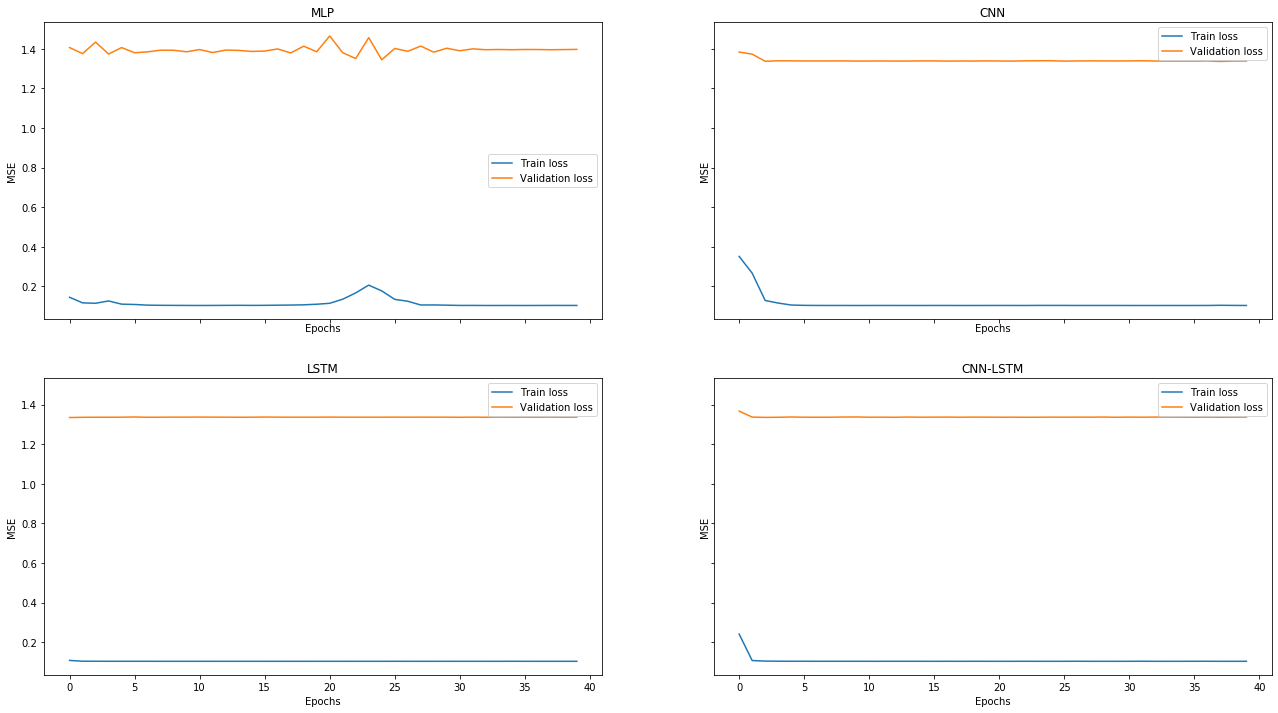

In [34]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(22,12))
ax1, ax2 = axes[0]
ax3, ax4 = axes[1]

ax1.plot(mlp_history.history['loss'], label='Train loss')
ax1.plot(mlp_history.history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('MLP')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

ax2.plot(cnn_history.history['loss'], label='Train loss')
ax2.plot(cnn_history.history['val_loss'], label='Validation loss')
ax2.legend(loc='best')
ax2.set_title('CNN')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')

ax3.plot(lstm_history.history['loss'], label='Train loss')
ax3.plot(lstm_history.history['val_loss'], label='Validation loss')
ax3.legend(loc='best')
ax3.set_title('LSTM')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('MSE')

ax4.plot(cnn_lstm_history.history['loss'], label='Train loss')
ax4.plot(cnn_lstm_history.history['val_loss'], label='Validation loss')
ax4.legend(loc='best')
ax4.set_title('CNN-LSTM')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('MSE')

plt.show()

### MLP

In [35]:
mlp_train_pred = model_mlp.predict(X_train.values)
mlp_valid_pred = model_mlp.predict(X_valid.values)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, mlp_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, mlp_valid_pred)))

Train rmse: 0.32289582632305186
Validation rmse: 1.181910930042312


### CNN

In [36]:
cnn_train_pred = model_cnn.predict(X_train_series)
cnn_valid_pred = model_cnn.predict(X_valid_series)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, cnn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_valid_pred)))

Train rmse: 0.3220651511014175
Validation rmse: 1.1568527788718683


### LSTM

In [37]:
lstm_train_pred = model_lstm.predict(X_train_series)
lstm_valid_pred = model_cnn.predict(X_valid_series)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_valid_pred)))

Train rmse: 0.3219816135422312
Validation rmse: 1.1568527788718683


### CNN - LSTM

In [38]:
cnn_lstm_train_pred = model_cnn_lstm.predict(X_train_series_sub)
cnn_lstm_valid_pred = model_cnn_lstm.predict(X_valid_series_sub)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, cnn_lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_lstm_valid_pred)))

Train rmse: 0.32197697666370606
Validation rmse: 1.156241160890669
